29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
uint8
['T-shirt/top' 'Trouser' 'Pullover' 'Dress' 'Coat' 'Sandal' 'Shirt'
 'Sneaker' 'Bag' 'Ankle boot']


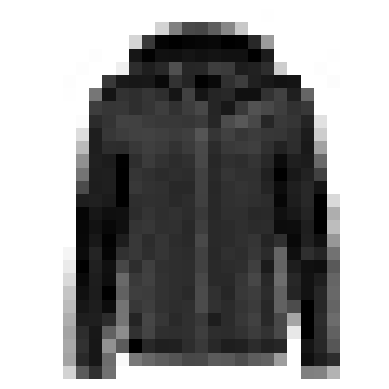

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6431 - loss: 1.1190 - val_accuracy: 0.7910 - val_loss: 0.6405
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7990 - loss: 0.6181 - val_accuracy: 0.8210 - val_loss: 0.5593
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8128 - loss: 0.5605 - val_accuracy: 0.8340 - val_loss: 0.5251
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8265 - loss: 0.5270 - val_accuracy: 0.8354 - val_loss: 0.5059
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8304 - loss: 0.5051 - val_accuracy: 0.8406 - val_loss: 0.4906
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8352 - loss: 0.4930 - val_accuracy: 0.8466 - val_loss: 0.4791
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8390 - loss: 0.4792 - val_accuracy: 0.8470 - val_loss: 0.4710
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8399 - loss: 0.4737 

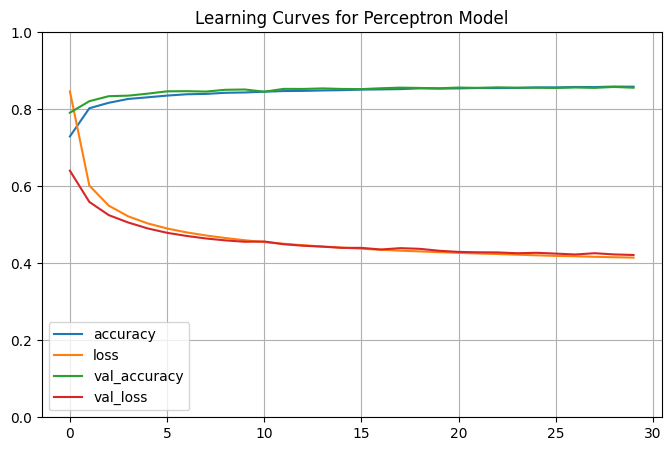

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8579 - loss: 0.4140
Training accuracy: 0.8604
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8416 - loss: 0.4484
Test accuracy: 0.8397
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Detailed training set accuracy: 0.8604
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Detailed test set accuracy: 0.8397


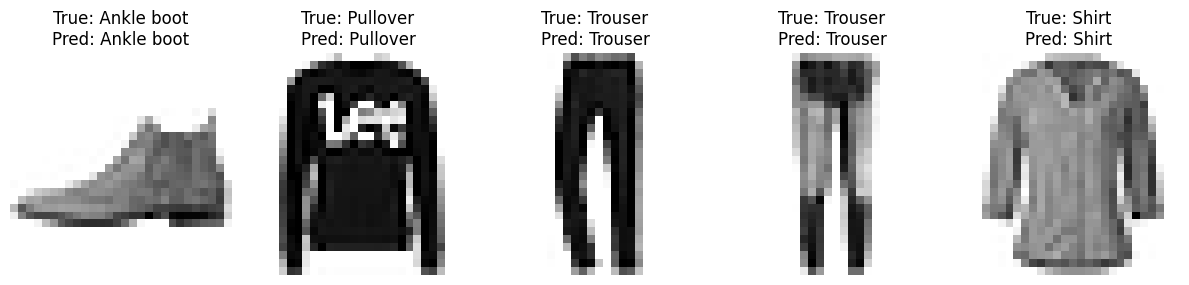

In [1]:
# ==================================================================================

# Fashion MNIST classification using Perceptron model

# --- Using Keras to load the dataset ---

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(X_train_full.dtype)

# --- Create a validation set & standardization ---

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# --- Create a list of class names ---

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(np.array(class_names)[0:10])

# --- Plot sample image ---

some_cloth = X_train[0]
some_cloth_image = some_cloth.reshape(28, 28)
plt.imshow(some_cloth_image, cmap="binary")
plt.axis("off")
plt.show()

# --- Creating the Perceptron model using the Sequential API ---

perceptron_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation="softmax")  # Single layer perceptron
])

# --- Display model information ---

perceptron_model.summary()

# --- Compiling the model ---

perceptron_model.compile(loss="sparse_categorical_crossentropy",
                        optimizer="sgd",
                        metrics=["accuracy"])

# --- Training and evaluating the model ---

history = perceptron_model.fit(X_train, y_train, epochs=30,
                              validation_data=(X_valid, y_valid))

# --- Learning curves ---

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("Learning Curves for Perceptron Model")
plt.show()

# --- Model evaluation on training set ---

train_loss, train_accuracy = perceptron_model.evaluate(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# --- Model evaluation on test set ---

test_loss, test_accuracy = perceptron_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# --- Using the model to make predictions ---

y_train_proba = perceptron_model.predict(X_train)
y_train_pred = np.argmax(y_train_proba, axis=1)
print(f"Detailed training set accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

y_test_proba = perceptron_model.predict(X_test)
y_test_pred = np.argmax(y_test_proba, axis=1)
print(f"Detailed test set accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# --- Display some predictions ---

n_images = 5
plt.figure(figsize=(12, 4))
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="binary")
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_test_pred[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()